In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [5]:
customer = pd.read_csv("C:/Users/Dell/Downloads/Python Foundation Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")
spend = pd.read_csv("C:/Users/Dell/Downloads/Python Foundation Case Study 2 - Credit Card Case Study/spend.csv")
repayment = pd.read_csv("C:/Users/Dell/Downloads/Python Foundation Case Study 2 - Credit Card Case Study/Repayment.csv")

In [6]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [7]:
print(customer.shape)

(100, 8)


In [8]:
print(customer.dtypes)

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object


In [9]:
#customer.isna().sum()    #no null values

In [10]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [11]:
print(spend.shape)
#spend.info

(1500, 5)


In [12]:
print(spend.dtypes)

print("......................................................")
spend.isnull().sum()     # no null values

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object
......................................................


Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [13]:
repayment.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN


In [14]:
print(repayment.shape)
repayment.dtypes


(1523, 5)


SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

In [15]:
repayment.isnull().sum()            # rows with null values and one column 'Unamed' with all null values

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [16]:
# dropping rows with null values and column with all null values

repayment.dropna(axis = 1, how = 'all', inplace = True)
repayment.dropna(axis = 0, how = 'all', inplace = True)


In [17]:
repayment.drop(['SL No:'], axis = 1, inplace = True)
repayment.isna().sum()

Customer    0
Month       0
Amount      0
dtype: int64

### 1. a) Replacing the age (less than 18years ) with mean age of Age column in Customer 

In [18]:
mean_age = customer.Age.mean()
print("the mean age of customers is",mean_age)

the mean age of customers is 46.49


In [19]:
##1. a)replacing the age (less than 18 ) with mean age
customer.loc[customer.Age < 18, "Age"] = customer.Age.mean()

In [20]:
mean_new = customer.Age.mean()
mean_new

48.399399999999986

In [21]:
print("All the customers with age less than 18 years are replaced by mean age of Age column. And new mean of Age column is",mean_new)

All the customers with age less than 18 years are replaced by mean age of Age column. And new mean of Age column is 48.399399999999986


### b) In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)¶

In [22]:
spend.drop(['Sl No:'], axis = 1 , inplace = True)
customer_spend = pd.merge(left=customer,right=spend,on="Customer",how="inner")
customer_spend.head(10)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
5,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,23-Feb-05,SANDALS,168285.60
6,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1-Feb-05,CAR,23370.20
7,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,TRAIN TICKET,440563.22
8,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5-Feb-04,BUS TICKET,52208.65
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,19-Apr-06,AIR TICKET,346925.68


In [23]:
customer_spend.loc[customer_spend.Amount > customer_spend.Limit,'Amount'] = (50 * customer_spend['Limit'])
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


### c) Incase the repayment amount is more than the limit, replace the repayment with the limit.
 

In [24]:
customer_repay = pd.merge(left=customer,right=repayment,on="Customer",how="inner")
customer_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88


In [25]:
customer_repay.loc[customer_repay.Amount > customer_repay.Limit, "Amount"] = customer_repay.Limit
customer_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88


## 2. From the above dataset create the following summaries:

### a. How many distinct customers exist?

In [26]:
customer.Customer.nunique()

100

### b. How many distinct categories exist?

In [27]:
categories = customer.Segment.value_counts()
categories

Govt             29
Self Employed    23
Normal Salary    22
Salaried_Pvt     13
Salaried_MNC     13
Name: Segment, dtype: int64

C:\Users\Dell\Anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


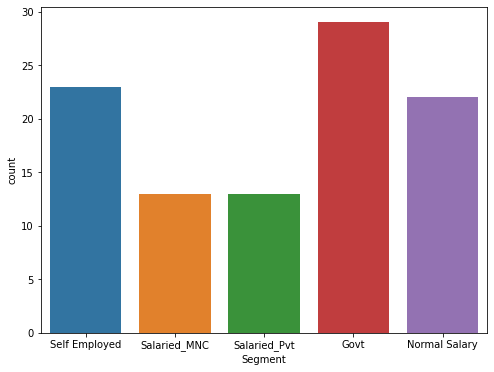

In [31]:
plt.figure(figsize=(8,6))
sns.countplot('Segment',data=customer)
plt.show()

In [32]:
print("There are",categories.count(),"distinct categores: Gvt-Employee, Self-Employed, Normal-Salary, MNC-Salary and Pvt-Salary.")


There are 5 distinct categores: Gvt-Employee, Self-Employed, Normal-Salary, MNC-Salary and Pvt-Salary.


### c. What is the average monthly spend by customers?

In [33]:
#
#customer_spend['Month'] = pd.to_datetime(spend['Month'])
#customer_spend.head()
#pd.DataFrame(customer_spend)
#customer_spend.dtypes
##------------------------------------------

spend['Month'] = pd.to_datetime(spend['Month'])
spend.head()

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07


In [34]:
#customer_spend['Monthly'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
#customer_spend['Yearly'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
#---------------------------------------------------------------------------------------------------------

#creating new columns which show "Month" and "Year"
spend['Monthly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['Yearly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [35]:
#customer_spend.head()

spend.head()

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005


##### Monthly SPEND 

In [36]:
#spendAmount = round(customer_spend.loc[:,['Yearly','Monthly','Amount']].groupby(by = ['Yearly','Monthly']).mean(),2)
#spendAmount

In [37]:
#grouping the dataset based on 'Yearly' and 'monthly'
customer_spend_group= round(spend.groupby(['Yearly','Monthly']).mean(),2)
customer_spend_group

Amount
Yearly Monthly             
2004   April      235272.04
       February   221215.27
       January    251712.07
       March      232146.12
       May        217539.24
       November   270486.40
       September  310923.38
2005   April      252181.33
       August     233734.63
       December   147503.06
       February   229802.28
       January    292741.37
       July       229116.66
       June       262688.11
       May        245696.52
       November   286143.32
       October    194568.64
       September  188666.20
2006   April      232468.97
       August     240699.72
       December   270470.98
       February   253858.26
       January    282058.01
       July       287505.10
       June       177252.39
       March      247166.08
       May        236162.74
       November   182841.29
       October    236136.33
       September  158520.09

### d. What is the average monthly repayment by customers?

In [38]:
#customer_repay['Month'] = pd.to_datetime(spend['Month'])
##customer_repay.drop(['SL No:'], axis = 1)
#customer_repay.head()

In [39]:
#customer_repay['Monthly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
#customer_repay['Yearly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [40]:
repayment.head(2)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02


In [41]:
#coverting "Month" column to date time format
repayment["Month"] = pd.to_datetime(repayment["Month"])
repayment.head(2)
#repayment.dtypes

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02


In [42]:
#creating new columns which show "Month" and "Year"
repayment['Monthly'] = repayment['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
repayment['Yearly'] = repayment['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [43]:
customer_repayment_group= round(repayment.groupby(['Yearly','Monthly']).mean(),2)


##### Average Monthly REPAYMENT by customers in year 2004, 2005 and 2006

In [44]:
customer_repayment_group

Amount
Yearly Monthly             
2004   April      259141.68
       February   256702.63
       January    243489.65
       March      252585.28
       May        226162.72
       November   209592.24
       September  184487.85
2005   April      212688.63
       August     264430.92
       December   320379.34
       February   238829.27
       January    240548.10
       July       239871.48
       June       210199.82
       May        263207.37
       November   256695.12
       October    219849.96
       September  247700.17
2006   April      275472.25
       August     224143.99
       December   252736.57
       February   284489.57
       January    293475.39
       July       257936.38
       June       251990.45
       March      240851.27
       May        256920.88
       November   199399.20
       October    260765.48
       September  262533.88

### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [45]:
customer_spend_group2 = round(spend.groupby(['Yearly','Monthly']).sum(),2)


In [46]:
customer_repayment_group2 = round(repayment.groupby(['Yearly','Monthly']).sum(),2)


In [47]:
# converting series into dataframe and changing the column name
customer_spend_group2 = pd.DataFrame(customer_spend_group2)
customer_spend_group2.rename(columns = {'Amount':'Amount_spend'}, inplace = True)
customer_repayment_group2 = pd.DataFrame(customer_repayment_group2)
customer_repayment_group2.rename(columns = {'Amount':'Amount_repay'}, inplace = True)

In [48]:
# joining the above two series created for monthly spend and monthly repayment
interest_group = pd.concat([customer_spend_group2,customer_repayment_group2], axis = 1)

In [49]:
# Monthly profit

interest_group['Monthly_profit'] = interest_group['Amount_repay'] - interest_group['Amount_spend']
interest_group


Amount_spend  Amount_repay  Monthly_profit
Yearly Monthly                                              
2004   April        6587617.04    7774250.37      1186633.33
       February     6194027.56    6930971.03       736943.47
       January     77275605.08   68177101.94     -9098503.14
       March        3250045.67    3788779.21       538733.54
       May          3045549.31    5654068.02      2608518.71
       November     3786809.57    3143883.57      -642926.00
       September    4352927.37    2951805.58     -1401121.79
2005   April        7061077.14    6380658.94      -680418.20
       August       6544569.76    9783944.10      3239374.34
       December     2065042.84    3844552.03      1779509.19
       February    38606783.01   38690340.95        83557.94
       January      8196758.44    6494798.65     -1701959.79
       July         3207633.29    2878457.75      -329175.54
       June        11032900.74    7567193.46     -3465707.28
       May         34397512.16   40533934.65      6136422.49
       November    12018019.56   10781195.04     -1236824.52
       October      2723960.97    2638199.48       -85761.49
       September    2641326.83    2972402.04       331075.21
2006   April       21852082.95   24792502.67      2940419.72
       August       3369796.04    2689727.91      -680068.13
       December     3786593.73    3032838.83      -753754.90
       February    10662046.95   11095093.04       433046.09
       January      3948812.09    3521704.67      -427107.42
       July         8050142.77    9543646.18      1493503.41
       June         2481533.41    3023885.44       542352.03
       March       53635040.37   49133658.43     -4501381.94
       May         13225113.46   22352116.99      9127003.53
       November     5119556.12    5383778.33       264222.21
       October      3305908.69    3129185.76      -176722.93
       September    2219281.27    3150406.57       931125.30

In [50]:
interestGroup_loss = interest_group[interest_group.Monthly_profit < 0]
total_loss = round(interestGroup_loss['Monthly_profit'].sum(),2) * (-1)
print(total_loss)

25181433.07


In [51]:
# Only taking positive values to find profit interest
interestGroup = interest_group[interest_group.Monthly_profit > 0]


In [52]:
interestGroup['interest_earned'] = (2.9 * (interestGroup['Monthly_profit']) / 100)
interestGroup

<ipython-input-52-c1921517de3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interestGroup['interest_earned'] = (2.9 * (interestGroup['Monthly_profit']) / 100)


Amount_spend  Amount_repay  Monthly_profit  interest_earned
Yearly Monthly                                                               
2004   April        6587617.04    7774250.37      1186633.33      34412.36657
       February     6194027.56    6930971.03       736943.47      21371.36063
       March        3250045.67    3788779.21       538733.54      15623.27266
       May          3045549.31    5654068.02      2608518.71      75647.04259
2005   August       6544569.76    9783944.10      3239374.34      93941.85586
       December     2065042.84    3844552.03      1779509.19      51605.76651
       February    38606783.01   38690340.95        83557.94       2423.18026
       May         34397512.16   40533934.65      6136422.49     177956.25221
       September    2641326.83    2972402.04       331075.21       9601.18109
2006   April       21852082.95   24792502.67      2940419.72      85272.17188
       February    10662046.95   11095093.04       433046.09      12558.33661
       July         8050142.77    9543646.18      1493503.41      43311.59889
       June         2481533.41    3023885.44       542352.03      15728.20887
       May         13225113.46   22352116.99      9127003.53     264683.10237
       November     5119556.12    5383778.33       264222.21       7662.44409
       September    2219281.27    3150406.57       931125.30      27002.63370

In [53]:
Interest_total = round(interestGroup['interest_earned'].sum(),2)

total_profit = round(interestGroup['Monthly_profit'].sum(),2)
print('TOTAL PROFIT               :' , total_profit)
print('TOTAL LOSS                 :', total_loss )
print('INTEREST  EARNED ON PROFIT :' , Interest_total )


TOTAL PROFIT               : 32372440.51
TOTAL LOSS                 : 25181433.07
INTEREST  EARNED ON PROFIT : 938800.77


### f. What are the top 5 product types?

In [54]:
spend['Type'].value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

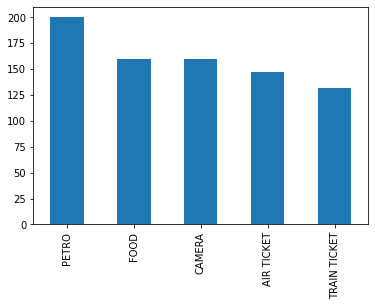

In [55]:
spend['Type'].value_counts().head().plot(kind ='bar')
plt.show()

### g. Which city is having maximum spend?

In [56]:
city_spend = customer_spend.groupby('City')['Amount'].sum().sort_values(ascending = False)
city_spend

City
BANGALORE     4.646854e+08
BOMBAY        3.944139e+08
COCHIN        3.840564e+08
DELHI         2.633726e+08
CALCUTTA      2.613892e+08
PATNA         2.281121e+08
TRIVANDRUM    1.202796e+08
CHENNAI       9.687532e+07
Name: Amount, dtype: float64

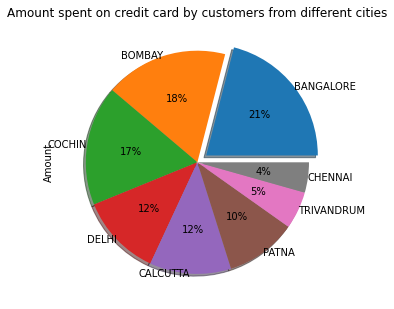

In [57]:
plt.figure(figsize=(5,10))
city_spend.plot(kind="pie",autopct="%1.0f%%",shadow=True,labeldistance=1.0,explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title("Amount spent on credit card by customers from different cities")
plt.show()


### h. Which age group is spending more money?

In [58]:
#creating new column "Age Group" with 8 bins between 18 to 88 
customer_spend["Age Group"] =  pd.cut(customer_spend["Age"],bins=np.arange(18,88,8),labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],include_lowest=True)

In [59]:
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,74-82
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,74-82
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47,74-82
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,74-82
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,50-58
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,500000.00,50-58
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,500050.00,50-58
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,500100.00,34-42


In [60]:
#grouping data based on "Age Group" and finding the amount spend by each age group and arranging in descending oreder
age_spend = round(customer_spend.groupby("Age Group")['Amount'].sum(),2).sort_values(ascending=False)
age_spend

Age Group
26-34    4.394265e+08
66-74    3.493594e+08
50-58    3.244129e+08
58-66    3.147388e+08
34-42    2.677268e+08
42-50    2.675794e+08
18-26    1.757181e+08
74-82    7.422252e+07
Name: Amount, dtype: float64

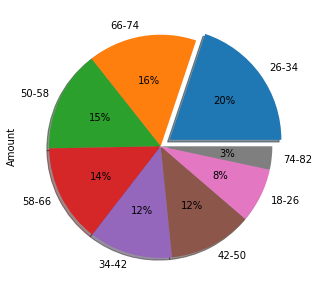

Customers in the sage group 26 to 34 years of age spend more.


In [61]:
plt.figure(figsize=(5,10))
age_spend.plot(kind = "pie",autopct="%0.f%%",explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0],shadow=True)
plt.show()
print("Customers in the sage group 26 to 34 years of age spend more.")

### i. Who are the top 10 customers in terms of repayment?

In [71]:
customer_repay['Month'] = pd.to_datetime(repayment['Month'])
customer_repay['Monthly'] =customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
customer_repay['Yearly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
#grouping based on "Customer" column to find top 10 customers
customer_repay.groupby("Customer")[["Amount"]].sum().sort_values(by="Amount",ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [73]:
customer_spend['Month'] = pd.to_datetime(spend['Month'])
customer_spend['Monthly'] =customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
customer_spend['Yearly'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
customer_spend_pivot = pd.pivot_table(customer_spend, values = ['Amount'], index = ['City','Yearly'], columns = ['Product'] , aggfunc = np.sum )
customer_spend_pivot

Amount                            
Product                   Gold      Platimum        Silver
City       Yearly                                         
BANGALORE  2004    16691505.60  5.354208e+07  4.031249e+07
           2005    10545974.87  5.142321e+07  1.404989e+08
           2006     6975372.15  7.446630e+07  7.022959e+07
BOMBAY     2004     7191163.83  1.351802e+08  9.010791e+07
           2005     5000444.12  4.311376e+07  3.500000e+07
           2006    11696408.17  4.159791e+07  2.552615e+07
CALCUTTA   2004     4671382.65  2.696419e+07  4.000055e+07
           2005    10317879.20  1.976473e+07  4.007623e+07
           2006    13958767.70  4.501228e+07  6.062316e+07
CHENNAI    2004     1648189.81  1.135427e+07  2.001500e+07
           2005     3788564.06  8.331557e+06  1.511787e+07
           2006     2068098.83  9.273702e+06  2.527806e+07
COCHIN     2004     6454961.50  3.431602e+07  5.517294e+07
           2005    12191194.91  3.937989e+07  3.000090e+07
           2006    11279449.15  8.464427e+07  1.106168e+08
DELHI      2004     1500274.78  5.019768e+06  2.510519e+07
           2005     3710926.38  4.528617e+07  7.518371e+07
           2006     2517242.43  1.500045e+07  9.004886e+07
PATNA      2004     4328370.11  1.379461e+06  9.508260e+07
           2005     2305072.29  2.101131e+06  5.009249e+07
           2006      967922.96  1.771847e+06  7.008317e+07
TRIVANDRUM 2004      857956.92  4.211760e+06  6.003432e+07
           2005     2444206.40  1.265148e+07  3.010202e+07
           2006     3089026.24  6.888820e+06           NaN

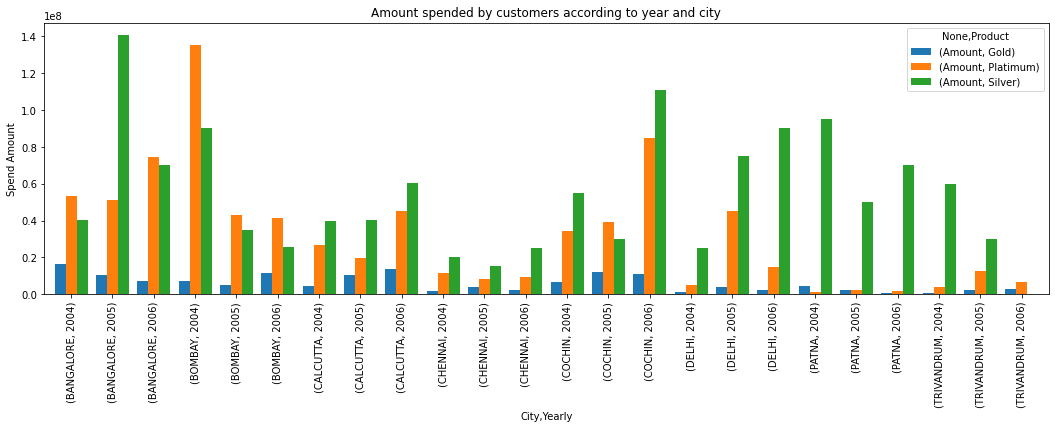

In [74]:
customer_spend_pivot.plot(kind="bar",figsize=(18,5),width=0.8)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

## 4. Create graphs for









### a. Monthly comparison of total spends, city wise

In [75]:
month_city = pd.pivot_table(data=customer_spend,values=['Amount'],index=['City'],columns='Monthly',aggfunc=np.sum) 
month_city.fillna(value = 0)

Amount                                                       \
Monthly           April       August     December     February       January   
City                                                                           
BANGALORE   64833790.91  16290334.23   1000200.00  72075425.57  3.573724e+07   
BOMBAY      33154616.35   1167777.54   1799721.07  74768963.13  2.269249e+08   
CALCUTTA    59559541.43   7888194.08   7694011.62  22855960.70  4.033325e+07   
CHENNAI     20352147.50    533376.26    578035.25   9414023.98  1.544001e+07   
COCHIN      54485443.77   3044485.63   2101171.94  84360882.36  8.390160e+07   
DELHI        6065056.22  10130937.33  10000200.00  37156459.25  3.510539e+07   
PATNA       20000000.00         0.00    274133.64  65305537.88  9.529452e+07   
TRIVANDRUM   2954166.54   1678657.65    488103.22  27229602.77  6.377843e+07   

                                                                               \
Monthly            July         June         March           May     November   
City                                                                            
BANGALORE   16626407.69  11401211.65  6.520951e+07  1.242966e+08  44912887.38   
BOMBAY       1098389.90   3294918.59  4.126240e+07  4.959329e+06   2288049.97   
CALCUTTA     7491215.14   8573077.46  3.658660e+07  5.847661e+07   2877231.71   
CHENNAI      1046116.34   1294647.22  2.468684e+07  2.060839e+07   1301894.67   
COCHIN       2797512.67   2313387.96  1.292172e+08  1.021841e+07   6283072.48   
DELHI       15260105.18  15160615.31  3.082780e+07  5.239171e+07  31106625.22   
PATNA              0.00         0.00  4.640975e+07  4.845740e+05    343548.59   
TRIVANDRUM   1200871.78   7391243.61  2.792719e+06  7.567085e+06   2662215.42   

                                      
Monthly         October    September  
City                                  
BANGALORE    1175859.72  11125987.49  
BOMBAY       1080276.02   2614586.71  
CALCUTTA     1676701.05   7376775.74  
CHENNAI       852425.15    767409.77  
COCHIN       2214775.82   3118450.68  
DELHI       10000200.00  10167488.00  
PATNA              0.00         0.00  
TRIVANDRUM   1004698.28   1531785.26

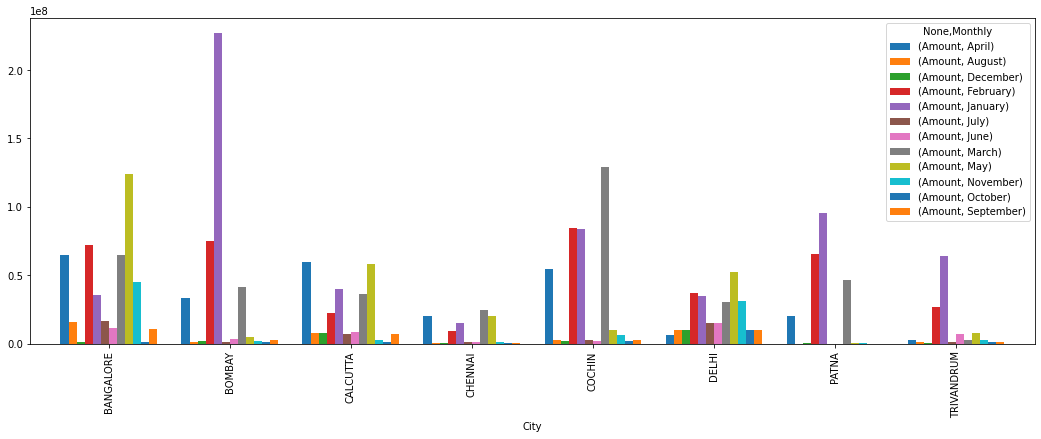

In [76]:
month_city.plot(kind="bar",figsize=(18,6),width=0.8)
plt.show()

### b. Comparison of yearly spend on air tickets

In [77]:
air_tickets = customer_spend.groupby(["Yearly","Type"])[["Amount"]].sum().reset_index()
filtered = air_tickets.loc[air_tickets["Type"]=="AIR TICKET"]
filtered

,Yearly,Type,Amount
0,2004,AIR TICKET,96038223.01
15,2005,AIR TICKET,60033996.09
30,2006,AIR TICKET,76443083.02


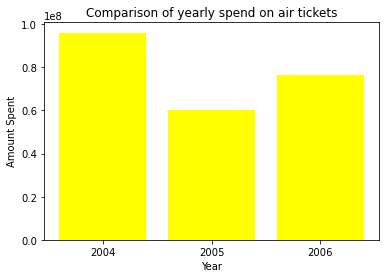

In [88]:
plt.bar(filtered["Yearly"],height=filtered["Amount"], color = "yellow" )
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on air tickets")
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)


In [91]:
product_wise = pd.pivot_table(customer_spend, values = ['Amount'], index = ['Yearly','Product'], columns = ['Monthly'],aggfunc = np.sum)
product_wise

Amount                                         \
Monthly                April       August    December      February   
Yearly Product                                                        
2004   Gold       2961999.32          NaN         NaN  3.416230e+06   
       Platimum  22737080.68          NaN         NaN  1.753640e+07   
       Silver    30094961.68          NaN         NaN  3.500030e+07   
2005   Gold       2051606.13   2085305.65  1213430.79  1.779232e+07   
       Platimum  11918272.84   9848936.29  3021022.61  8.463820e+07   
       Silver    30177890.83  15000300.00  5000100.00  1.802940e+08   
2006   Gold       7391011.68   1653828.00  1958465.73  4.053327e+06   
       Platimum  63733920.31   6739379.64  7742457.61  1.033349e+07   
       Silver    90338019.25   5406013.14  5000100.00  4.010261e+07   

                                                                       \
Monthly               January         July         June         March   
Yearly Product                                                          
2004   Gold      3.146132e+07          NaN          NaN  1.583481e+06   
       Platimum  1.963549e+08          NaN          NaN  6.013018e+06   
       Silver    3.106049e+08          NaN          NaN  2.000025e+07   
2005   Gold      2.343821e+06    820740.40   3363719.32           NaN   
       Platimum  1.247680e+07   3619588.18   7837030.08           NaN   
       Silver    3.003786e+07  10000250.00  25128738.22           NaN   
2006   Gold      1.027473e+06   2090771.92   1138876.38  2.091483e+07   
       Platimum  2.208159e+06  18491456.57   6929588.87  1.131040e+08   
       Silver    1.000010e+07  10497811.63   5031148.93  2.153773e+08   

                                                                   
Monthly                  May     November     October   September  
Yearly Product                                                     
2004   Gold       1091984.10   1516759.92         NaN  1312028.44  
       Platimum  11101406.11  11591184.52         NaN  6633698.36  
       Silver    15035548.96  10000200.00         NaN  5094888.40  
2005   Gold      14264060.17   3910246.54  1016830.46  1442183.09  
       Platimum  65328325.82  16908235.44  3294255.56  3161254.90  
       Silver    90401858.39  20030913.80  5000100.00  5000100.00  
2006   Gold       5446768.79   3726881.70  1447402.11  1702646.84  
       Platimum  31155307.45   9090803.52  2246247.91  6880786.32  
       Silver    45177408.53  15000300.00  5000100.00  5474897.30

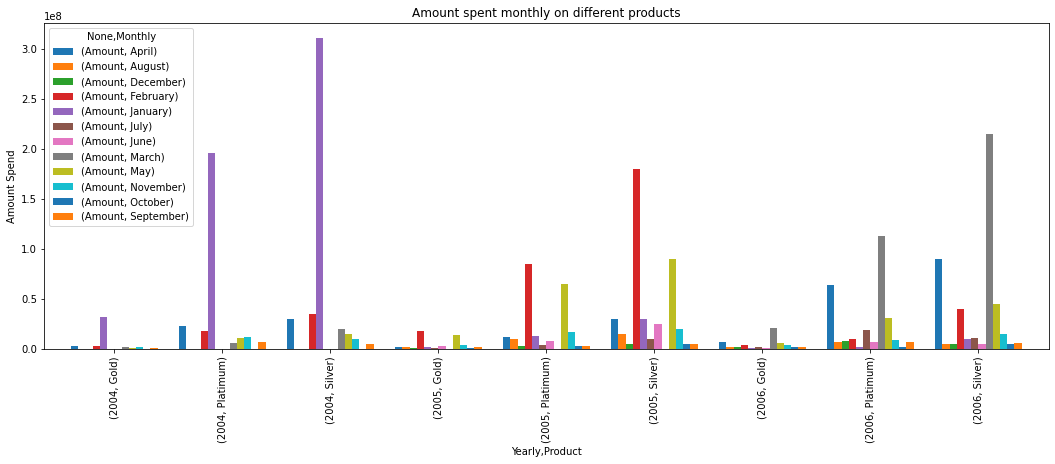

In [90]:
product_wise.plot(kind="bar",figsize=(18,6),width=0.8)
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

#### Amount spent on different products is higher :
###### . January in the year 2004  (With SILVER Type being the highest spent on )
###### . February in the year 2005, followed by May
###### . March in the year 2006, followed by April

## 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [81]:
 def summary_report(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [93]:
# example : To view the data of SILVER product type year wise.
summary_report('silver','yearly')

Give the product name and timeperiod for which you want the data


Yearly                             2004        2005        2006
Product City       Customer                                    
Silver  BANGALORE  A18       1091592.71         NaN   738296.41
                   A23       1805097.59   632802.44   100001.00
                   A59        400012.00   703792.58   600018.00
                   A72              NaN   100000.00         NaN
                   A76              NaN   265619.05         NaN
                   A77              NaN     3159.62         NaN
        COCHIN     A100        69551.19         NaN         NaN
                   A25        200006.00  1625301.03   572616.74
                   A7         703103.02         NaN   828077.12
                   A74              NaN   100002.00         NaN
                   A79              NaN   193230.31         NaN
        CALCUTTA   A2         210274.00   400000.00   400000.00
                   A58        371295.84   408754.94   705578.86
                   A73              NaN   100001.00         NaN
                   A78              NaN    55344.81         NaN
                   A87              NaN         NaN   100003.00
        BOMBAY     A22        592140.92   591357.70  1856735.49
                   A75        100003.00         NaN         NaN
                   A80              NaN         NaN   481205.64
        CHENNAI    A85              NaN         NaN   100001.00
                   A9         339323.91   487597.98   751131.74
                   A96              NaN   100000.00         NaN
        TRIVANDRUM A57       1078554.42   677383.57   100001.00
                   A68        200000.00         NaN         NaN
                   A86              NaN   100002.00         NaN
        PATNA      A46       1013951.50   842007.46   813614.32
                   A8        1131824.40   600012.00         NaN
                   A84        100000.00         NaN         NaN
        DELHI      A24        409691.68   536124.78  1347137.57
                   A6         227398.18   654065.23   601789.43